<a href="https://colab.research.google.com/github/Mwangi-dan/linear_regression_model/blob/main/summative/linear_regression/cellphone_prediction_multivariate_Linear_regression_Daniel_Ndungu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [31]:
# Loading the data
cell_data_path = "/content/drive/MyDrive/ML_summative/Data/Cellphone.csv"

data = pd.read_csv("/content/drive/MyDrive/ML_summative/Data/Cellphone.csv")

# print first rows
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [32]:
# Explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [33]:
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [46]:
# Drop unnecessary columns
X = data.drop(columns=["Product_id", "Price", "Sale"])
Y = data["Price"]

print(Y)
print(X)

0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64
     weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram  \
0     135.0         5.20  424         8     1.350          16.0  3.000   
1     125.0         4.00  233         2     1.300           4.0  1.000   
2     110.0         4.70  312         4     1.200           8.0  1.500   
3     118.5         4.00  233         2     1.300           4.0  0.512   
4     125.0         4.00  233         2     1.300           4.0  1.000   
..      ...          ...  ...       ...       ...           ...    ...   
156   178.0         5.46  538         4     1.875         128.0  6.000   
157   170.0         5.50  534         4     1.975         128.0  6.000   
158   150.0         5.50  401         8     2.200          64.0  4.000   
159   170.0         5.50  534         4     1.975         128.0  6.000   
160   202.0    

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        161 non-null    float64
 1   resoloution   161 non-null    float64
 2   ppi           161 non-null    int64  
 3   cpu core      161 non-null    int64  
 4   cpu freq      161 non-null    float64
 5   internal mem  161 non-null    float64
 6   ram           161 non-null    float64
 7   RearCam       161 non-null    float64
 8   Front_Cam     161 non-null    float64
 9   battery       161 non-null    int64  
 10  thickness     161 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 14.0 KB


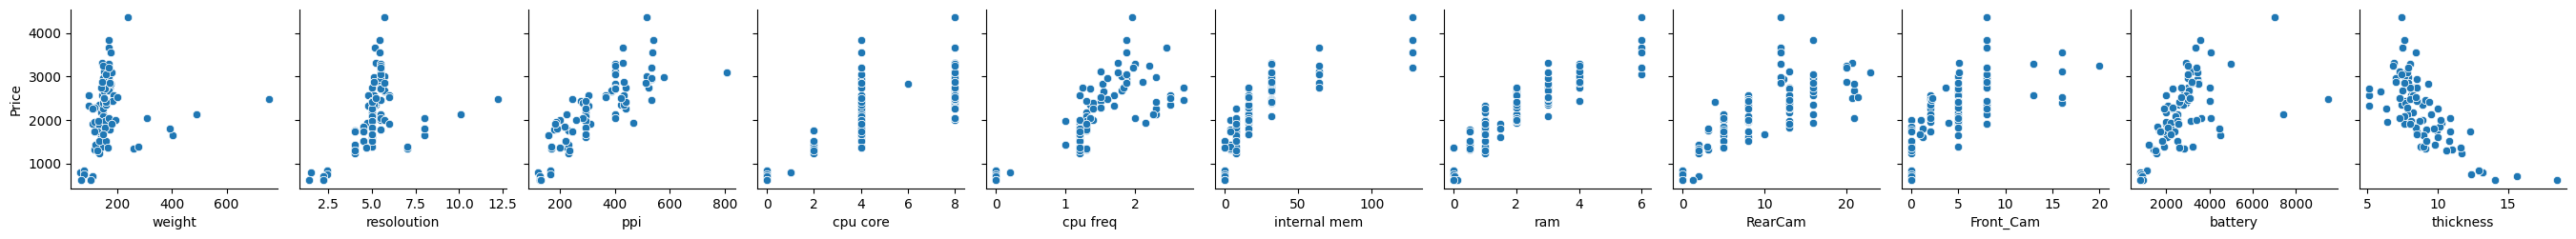

In [48]:
# prompt: I want to visualise the above data in a single plot graph

import matplotlib.pyplot as plt
# Assuming 'X' contains numerical features you want to visualize against 'Price' (Y)

# Pairplot to visualize relationships between all numerical columns
sns.pairplot(data, x_vars=X.columns, y_vars=["Price"])
plt.show()


# Training Model

In [49]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=71)

In [50]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [51]:
y_predict = model.predict(X_test)

In [52]:
# prompt: Compare predicted values and actual values

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_predict})
print(df)


     Actual    Predicted
110     754   891.846388
34     1421  1379.184388
53     3658  3398.701171
119    1734  1529.197437
134    2266  2243.916323
103    2343  2328.833152
146    3102  3288.506960
129    2466  2655.212075
142    2508  2584.758350
120    1734  1529.197437
4      1749  1521.314834
60     2824  2537.539107
77     1396  1518.976066
38     1777  1506.675116
131    1357  1381.313448
44     2859  2957.291691
84     1646  1575.090031
136    2445  2405.876630
29     1950  1846.556954
100    2343  2328.833152
90     1646  1575.090031
49     2685  2710.313512
135    2445  2405.876630
35     2654  2710.756156
144    1921  1721.436864
102    1522  1426.845699
85     1396  1518.976066
68     1734  1728.707773
12     2174  1889.240142
124    2880  3034.125544
86      791   911.885584
91     1831  1828.145576
65     2824  2537.539107


In [53]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23479.63519058537
R-squared: 0.9447676803974276


In [54]:
# percentage accuracy
accuracy = model.score(X_test, Y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 94.48%


# Saving Model

In [55]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']